### 3.1 K-mean WINE, PCA

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import SparseRandomProjection

# Load UCI Wine Quality - https://archive.ics.uci.edu/dataset/186/wine+quality

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [3]:
n = 3
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.5119542085472468, 0.5049915112802178, 0.4524566012155987, 0.421278248426519, 0.3965372285360554, 0.3698687912898592, 0.3694434999453737, 0.3472666614613102, 0.3422909022884072]


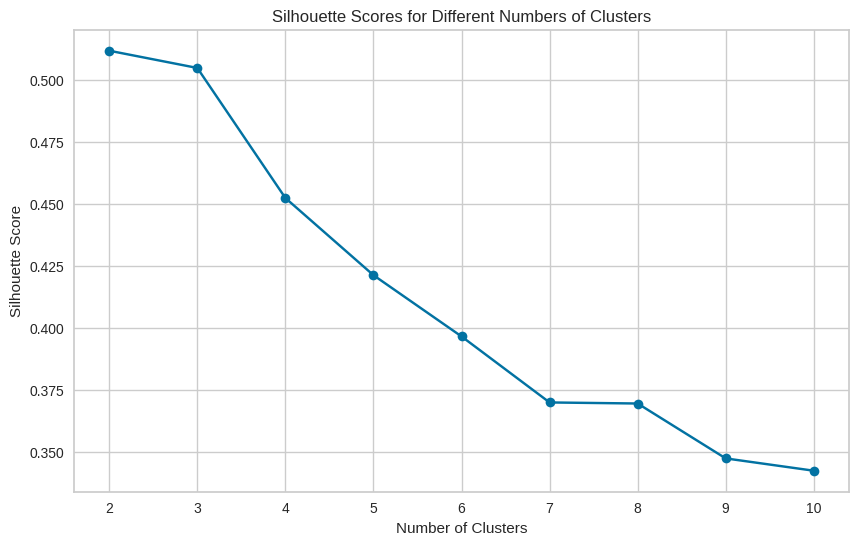

(2, 0.5119542085472468, 0.5042447163348556)

In [4]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

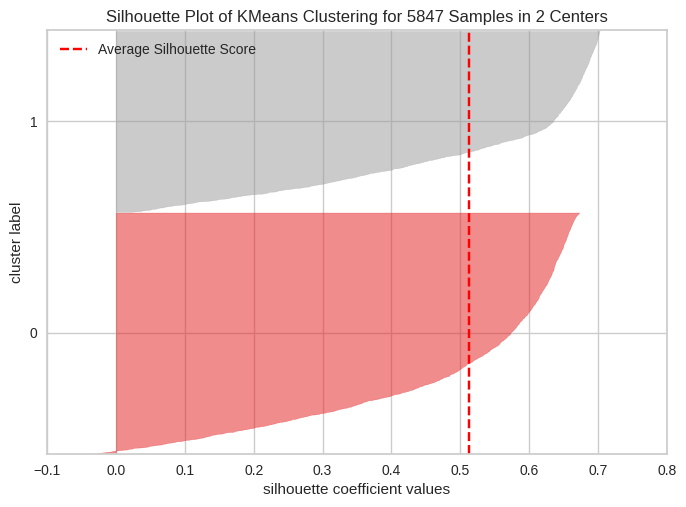

In [5]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

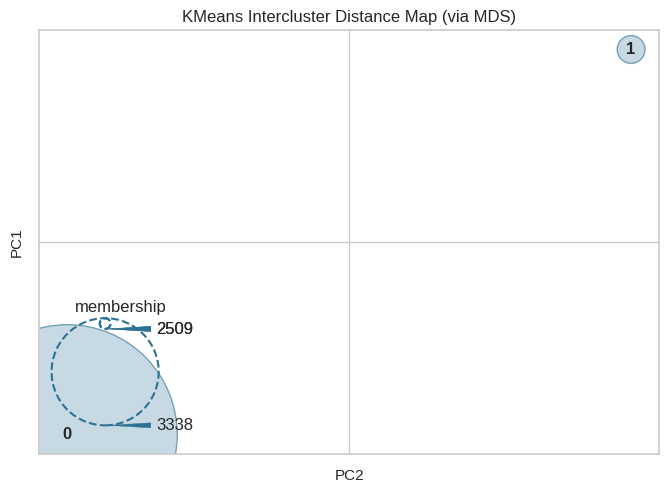

In [6]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.2 K-mean WINE, ICA

In [7]:
n = 5
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.183007040430614, 0.19751551968045666, 0.20907921142686953, 0.21949193505344886, 0.22650365061335134, 0.2200516953254951, 0.20206276939128065, 0.19026890009210456, 0.18804328579936788]


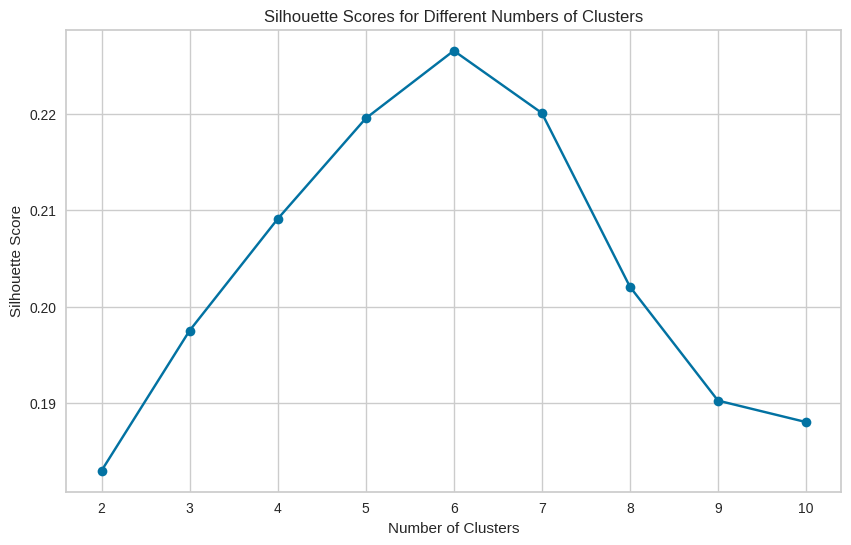

(6, 0.226510057954001, 0.22889263371047577)

In [8]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

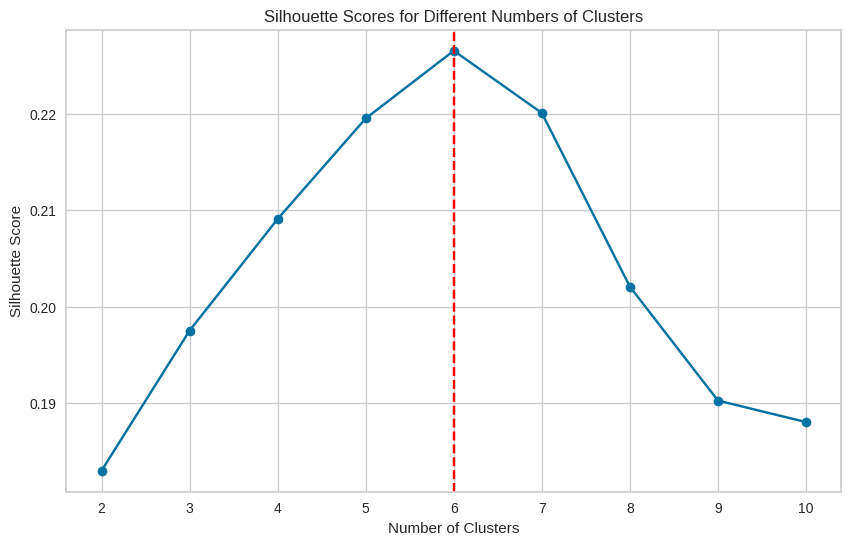

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

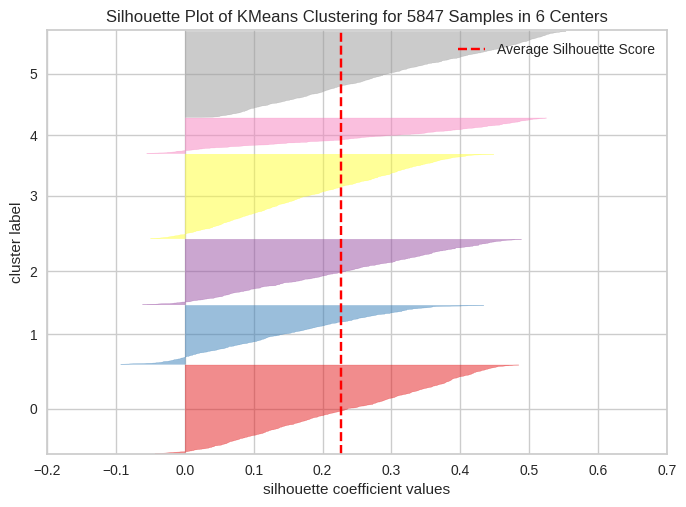

In [10]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

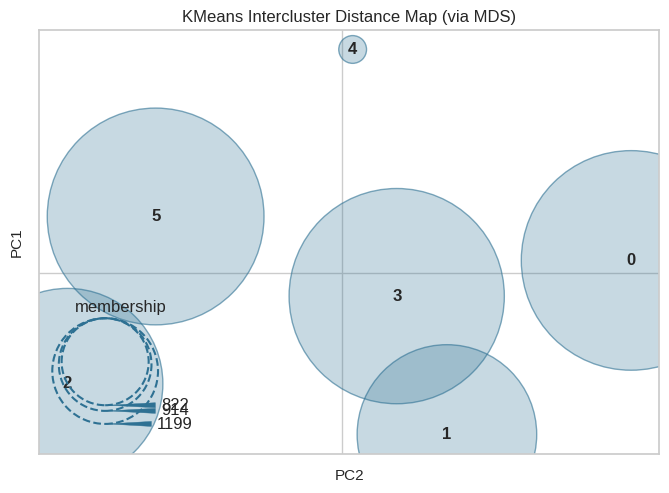

In [11]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.3 K-mean WINE, RP

In [12]:
n = 5
rp = SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.5109848637817556, 0.5039764686840437, 0.45190020995973074, 0.42153351145842255, 0.3957268396263948, 0.36866538581655056, 0.36815839639839304, 0.35124856145789496, 0.34413148703790436]


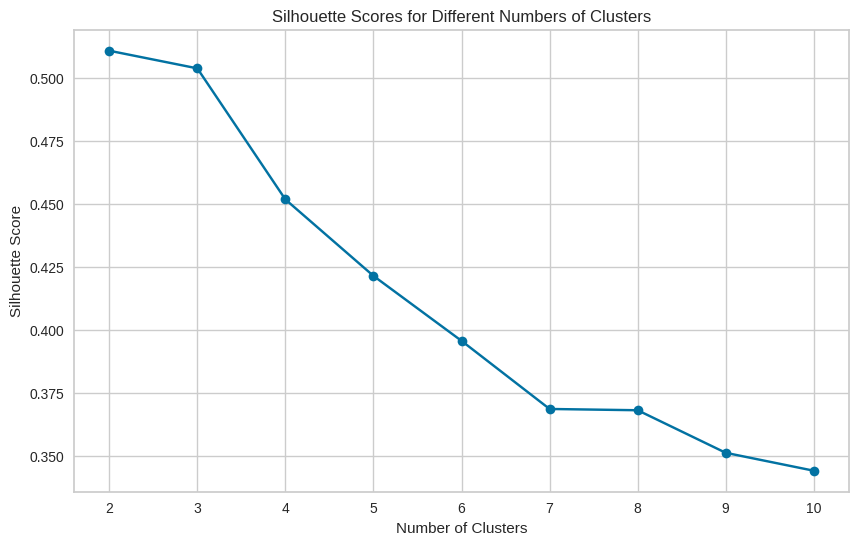

(2, 0.5109624833007373, 0.5023475894200052)

In [13]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

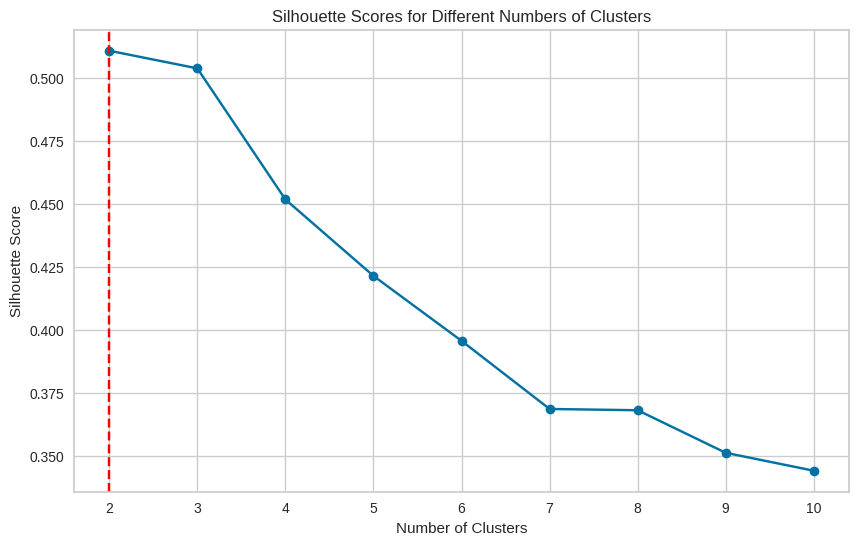

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

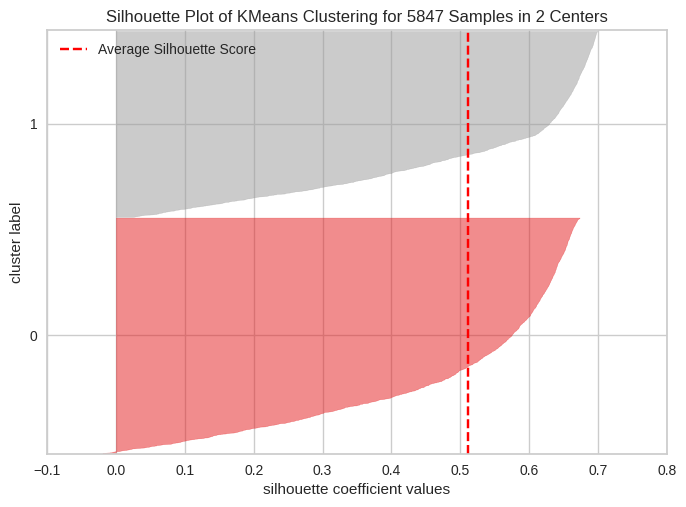

In [15]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

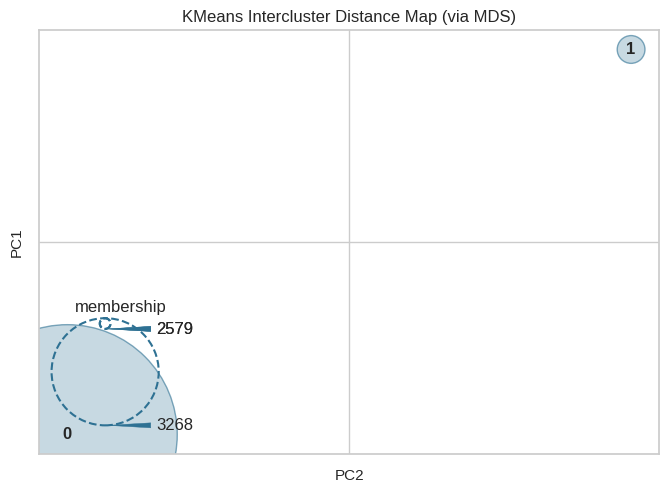

In [16]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.4 K-mean WINE, SVD

In [17]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.5109915343203938, 0.5036150961630589, 0.45040197363507867, 0.4184153535566006, 0.3932731372139359, 0.36614649839579244, 0.3643979568833862, 0.34491414555856265, 0.34296644265412746]


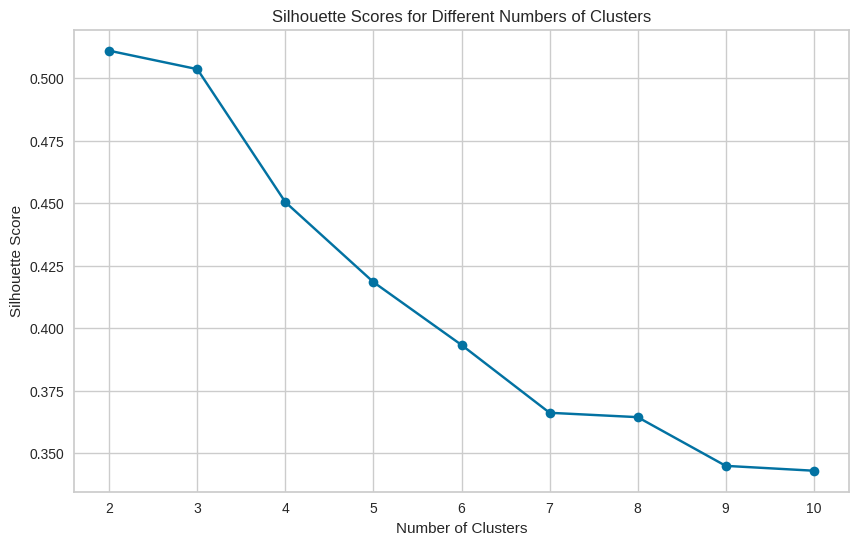

(2, 0.5109915343203938, 0.5033801764624748)

In [18]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

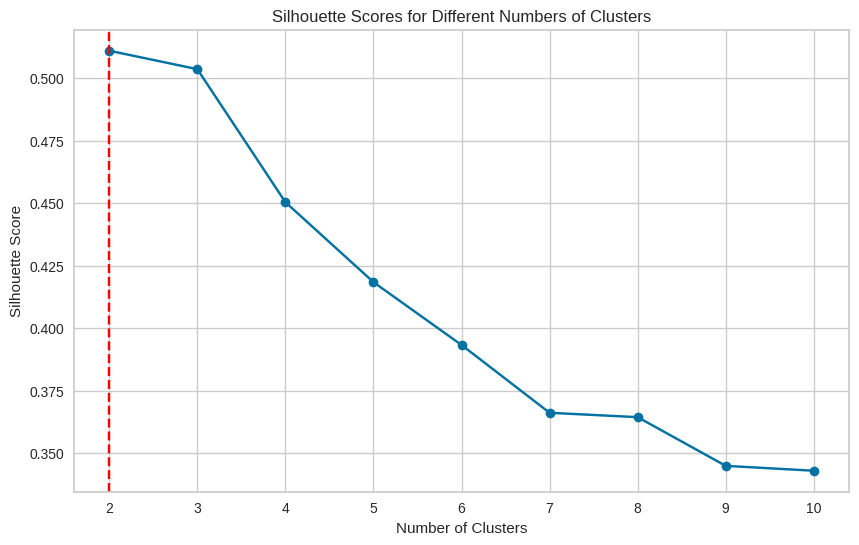

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

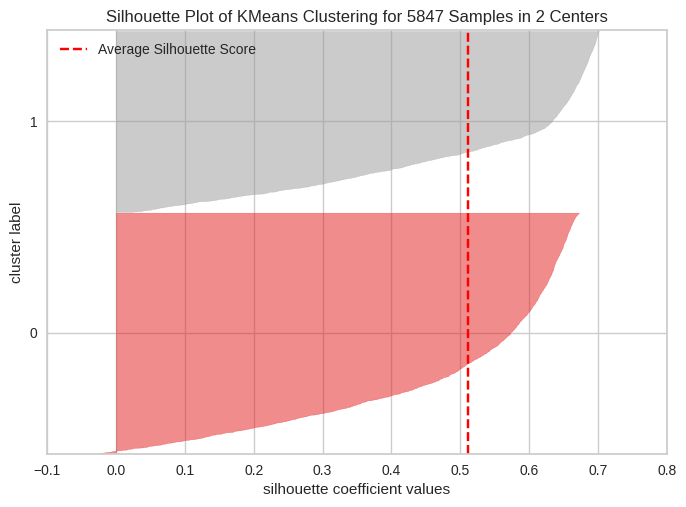

In [20]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

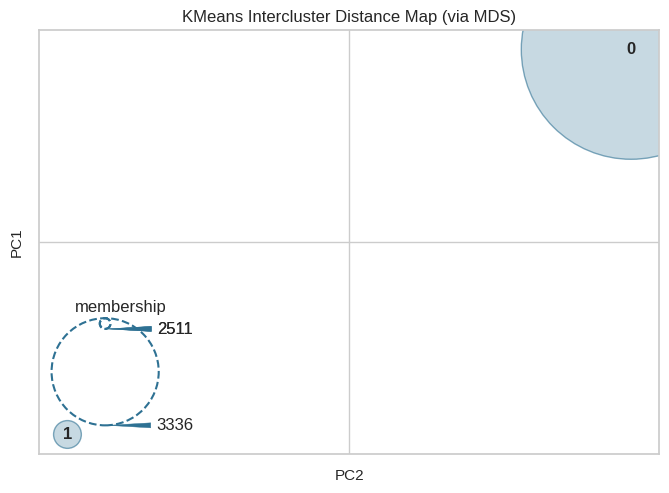

In [21]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.5 EM WINE, PCA

In [22]:
n = 3
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

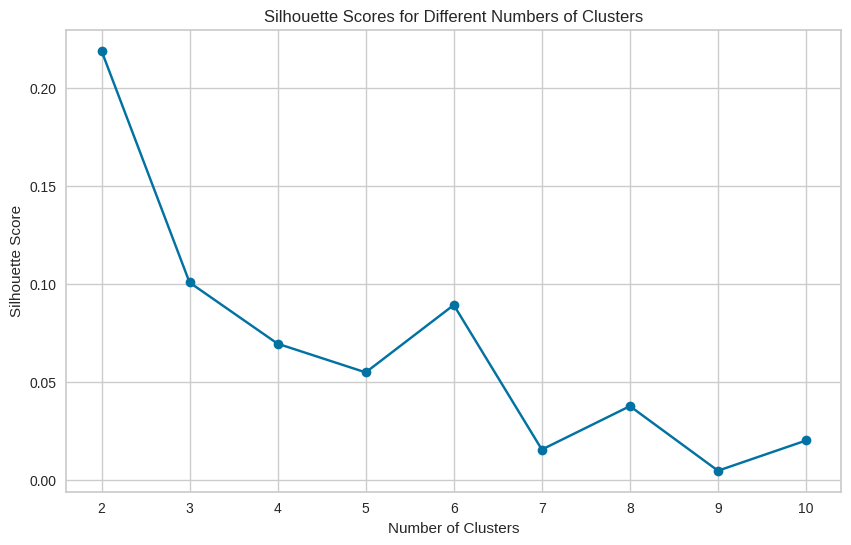

(2, 0.21885194868819047, 0.24418074240317397)

In [23]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

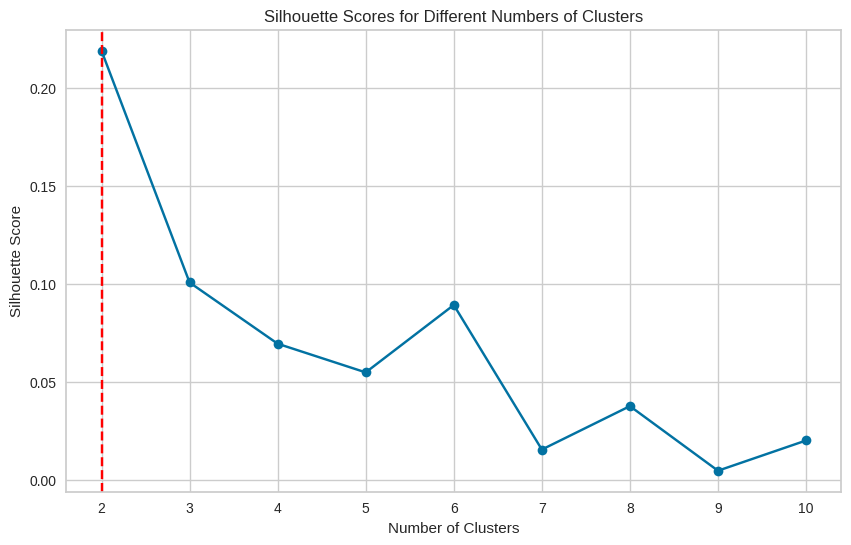

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

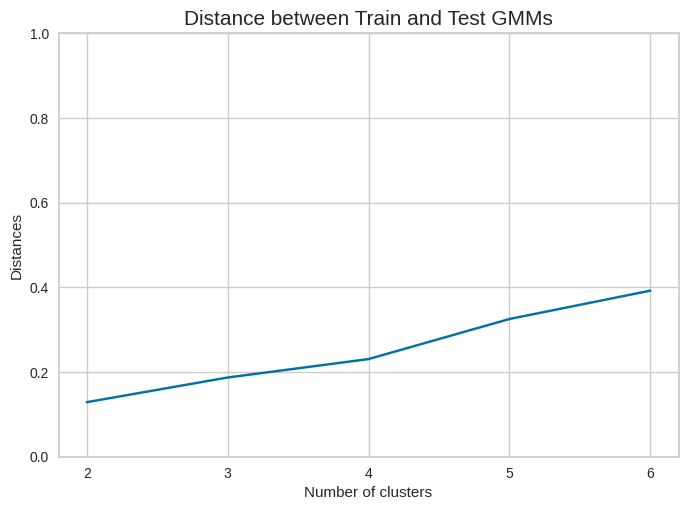

In [25]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 3.6 EM WINE, ICA

In [26]:
n = 5
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.1, random_state=100) # 80% training and 30% test

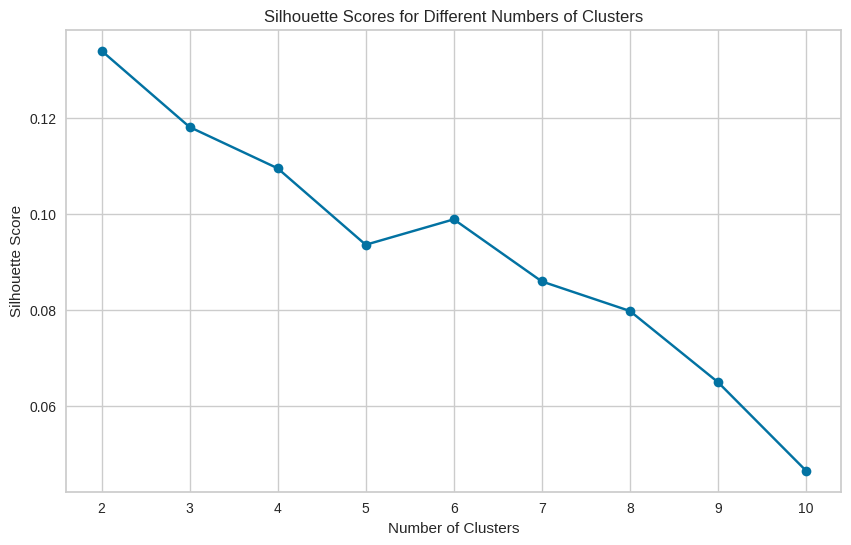

(2, 0.13410859952165466, 0.12852297819444375)

In [27]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

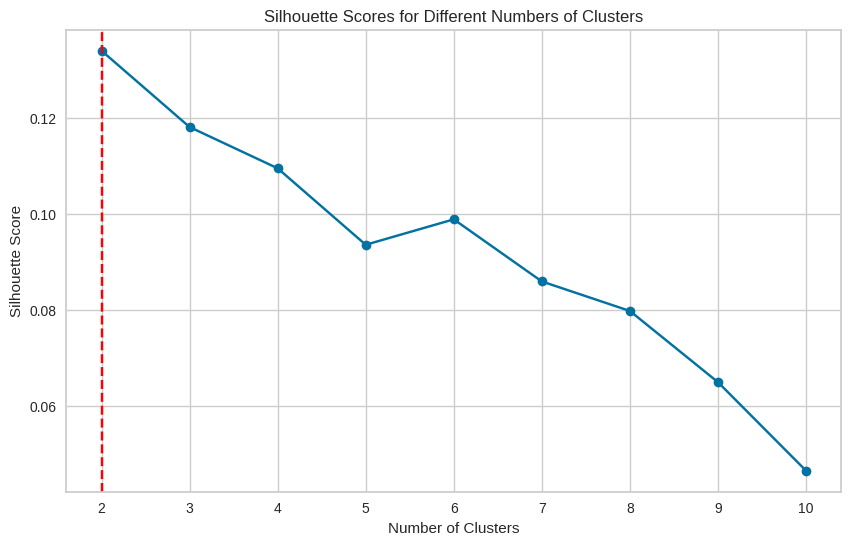

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

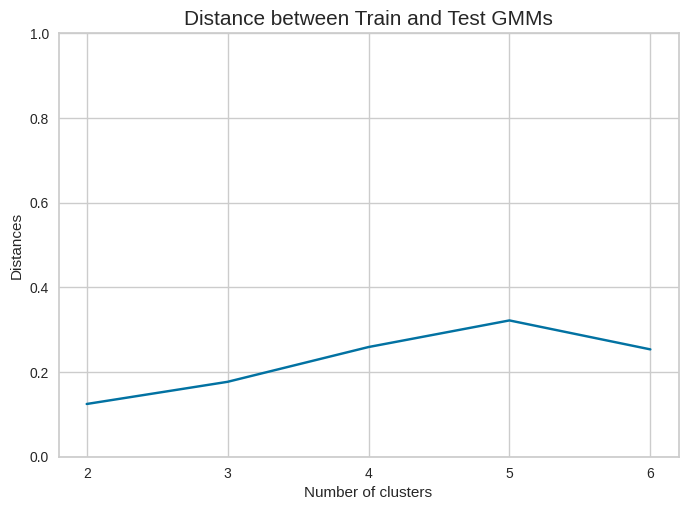

In [29]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 3.7 EM WINE, RP

In [30]:
n = 5
rp = SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.1, random_state=100) # 80% training and 30% test

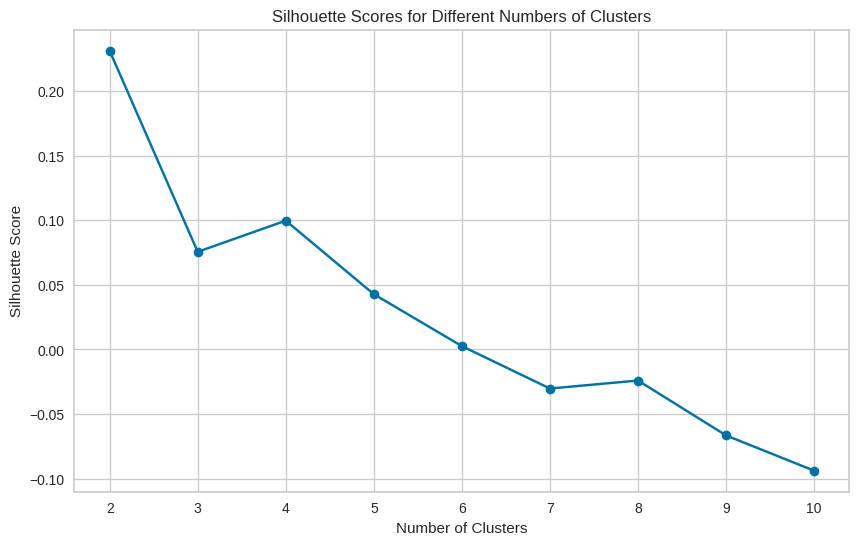

(2, 0.2313205405458458, 0.24756404555826336)

In [31]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

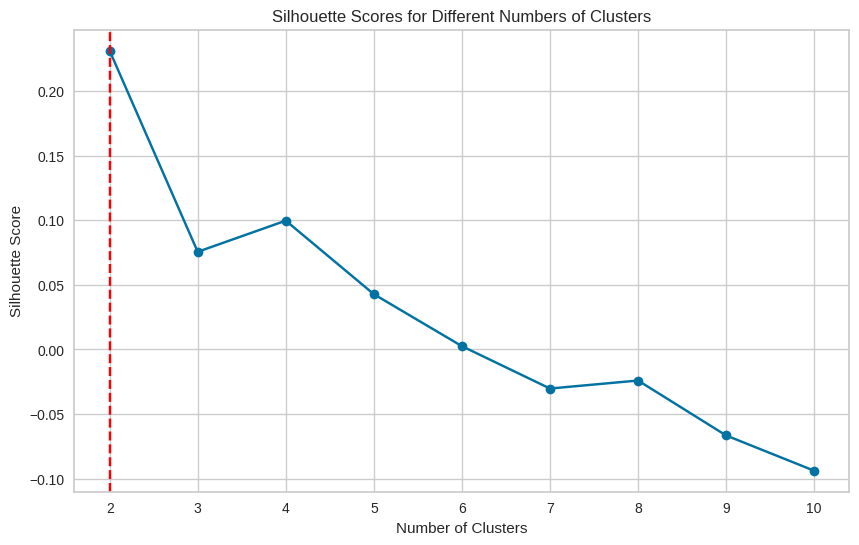

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

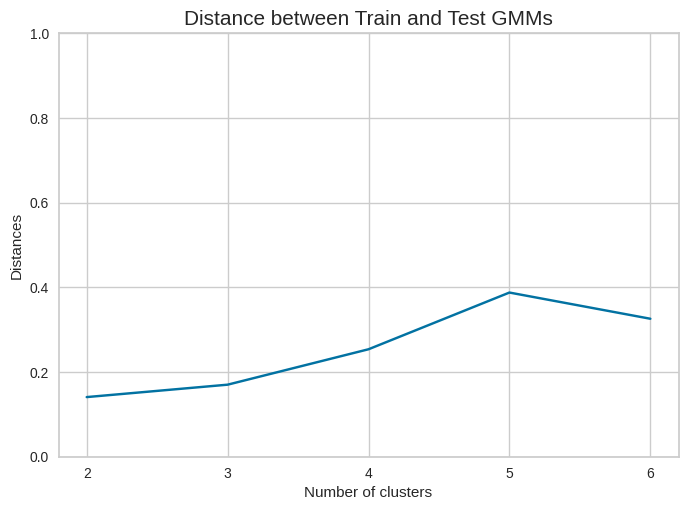

In [33]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 3.8 EM WINE, SVD

In [34]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

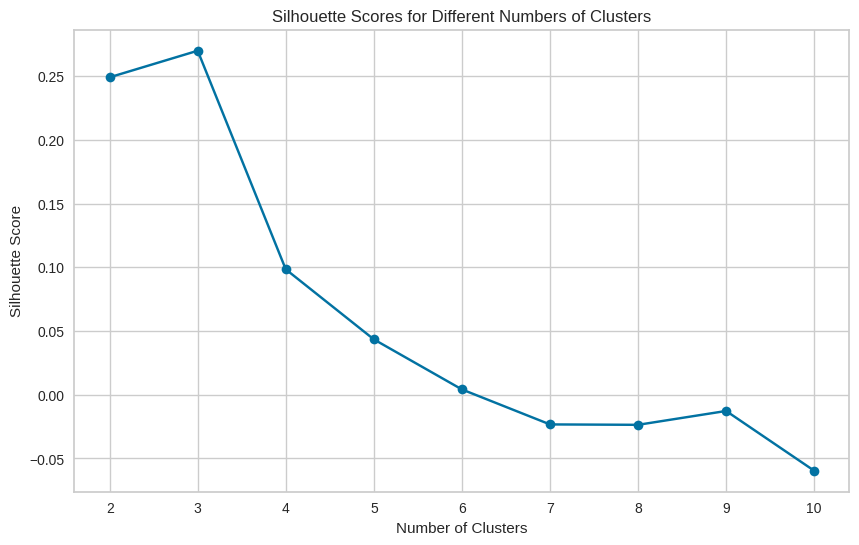

(3, 0.26992209926071986, 0.2550536743725389)

In [35]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

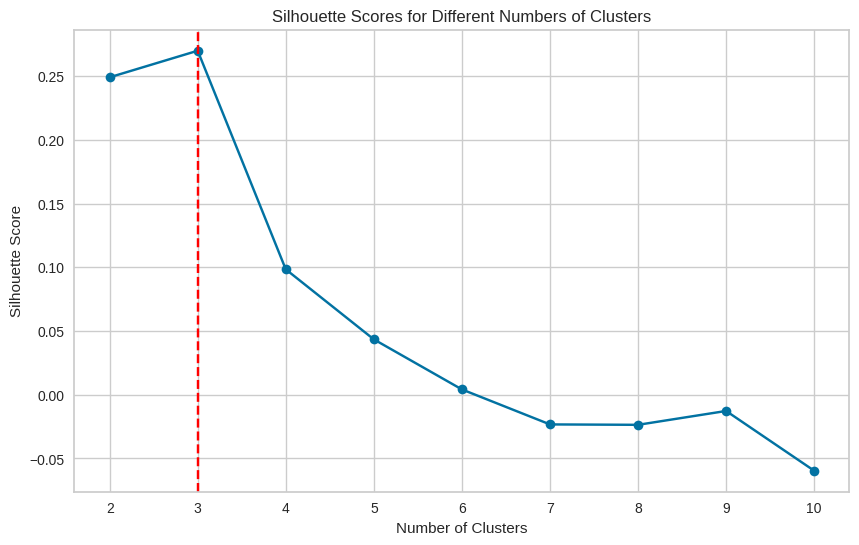

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

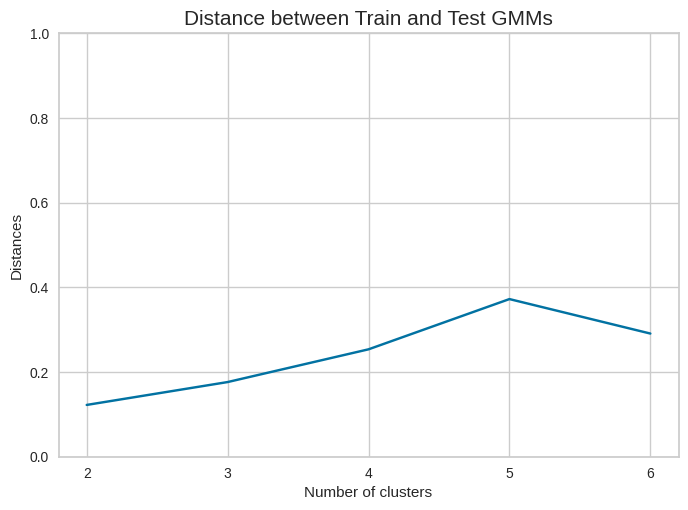

In [37]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()